### Selected transcripts expression variation among 216 rice accessions in Groen dataset (dry and wet conditions)

#### Dataset
From Groen et al., 2020 Nature
https://www.nature.com/articles/s41586-020-1997-2

Data downloaded from https://zenodo.org/records/3533431

"Data normalization
The aim of normalization is to make expression levels comparable between samples by removing the effect of sequencing depth, and technical sources of heterogeneity (in our case the processing of samples in different libraries) that may confound the signal of interest. To account for differences in the total number of molecules sequenced per library, we normalized UMI counts from each sample by dividing by the total number of UMIs detected in that sample. These numbers were multiplied by 1 × 106 to obtain transcripts per million. This scaling factor largely represents a consistent increase or decrease across all positive values in our dataset. We then merged the 14 pruned digital gene-expression matrices into one super-matrix that contained transcripts-per-million expression data for all 1,320 samples after the low-quality samples had been removed. After this, very lowly transcribed elements (transcript models with a sigma signal < 20) were filtered out, and a relatively strong normalization was applied to the remaining elements in the matrix through invariant set normalization using the DChip utility version 2010.0143 (Wong Laboratory, https://sites.google.com/site/dchipsoft/). These steps ensured that rarely encountered elements were filtered out and that confounding technical effects were removed. All downstream calculations were performed in log-space, using normalized levels (log2(normalized transcripts-per-million value + 1)) of transcribed elements that were obtained using the R (version 3.4.3) package edgeR version 3.1444,45. To make sure we did not consider transcripts that are relevant only for accessions in the temperate japonica subgroup of which Nipponbare is a representative38, we kept only transcripts from protein-coding genes on nuclear chromosomes that were detected in at least 10% of individuals across our populations for all subsequent analyses."

#### Questions
1. How does the expression of the OS04T0448900-00 transcript vary across the dataset of 216 accessions in wet conditions? 
2. How does the expression of the OS04T0448900-00 transcript vary between wet and dry conditions for all samples?

| MSU-7 | RAPDB name | Transcripts in Groen dataset |
|-------|------------|------------------------------|
| LOC_Os1g64960 | Os01g0869800 | OS01T0869800-01 |
| LOC_Os04g31040 | Os04g0379700 | OS04T0379700-01 |
| LOC_Os04g37619 | Os04g0448900 | OS04T0448900-00 |
| LOC_Os04g53490 | Os04g0626400 | OS04T0626400-01 |
|  |  | OS04T0626400-02 |
|  |  | OS04T0626400-03 |

*Os04g0626400 gene transcripts had 0 TPM counts in the dataset

### Analysis pipeline

In [1]:
import pandas as pd
import numpy as np

# Load the data files
data = pd.read_csv('GroenProcessedExpressionCountData.csv', index_col=0)
metadata = pd.read_csv('GroenProcessedExpressionCountMetadata.csv')

print("Data shape:", data.shape)
print("\nMetadata shape:", metadata.shape)
print("\nFirst few gene IDs:")
print(data.index[:10].tolist())

Data shape: (98895, 1345)

Metadata shape: (15, 1346)

First few gene IDs:
['EPlOSAT00000003714', 'OS01T0100100-01', 'OS01T0100200-01', 'OS01T0100300-00', 'OS01T0100400-01', 'OS01T0100466-00', 'EPlOSAT00000008851', 'OS01T0100500-01', 'EPlOSAT00000031129', 'EPlOSAT00000031678']


In [2]:
# Check if the target transcript exists
target_transcript = 'OS04T0379700-01'
if target_transcript in data.index:
    print(f"✓ Found {target_transcript} in the data")
else:
    print(f"✗ {target_transcript} not found in the data")
    
# Check metadata structure
print("\nMetadata columns:")
print(metadata.columns[:10].tolist())
print("\nMetadata 'Sample' column (first 5):")
print(metadata['Sample'].head().tolist())

✓ Found OS04T0379700-01 in the data

Metadata columns:
['Sample', 'HMTYCBGX3_TTGTCGCATCCA', 'HMTYCBGX3_CCTACAAGATGC', 'HMTYCBGX3_CACAGAAGGACT', 'HMTYCBGX3_TCCACACTTGCA', 'HMTYCBGX3_CAGAACGACAGT', 'HMTYCBGX3_CTAGCTGGATGT', 'HMTYCBGX3_TCAACCGATAGG', 'HMTYCBGX3_GGATAGTTAGCC', 'HMTYCBGX3_TACTGCAAGGAG']

Metadata 'Sample' column (first 5):
['SRA BioProject', 'SRA BioSample', 'Library Number', 'Library Code', 'Sample Barcode']


In [3]:
# Transpose metadata to have samples as rows
metadata_t = metadata.T
metadata_t.columns = metadata_t.iloc[0]
metadata_t = metadata_t.drop(metadata_t.index[0])
metadata_t = metadata_t.reset_index()
metadata_t.columns.name = None
metadata_t = metadata_t.rename(columns={'index': 'Sample_ID'})

print("Transposed metadata shape:", metadata_t.shape)
print("\nMetadata columns after transpose:")
print(metadata_t.columns.tolist())
print("\nFirst few rows:")
print(metadata_t.head())

Transposed metadata shape: (1345, 16)

Metadata columns after transpose:
['Sample_ID', 'SRA BioProject', 'SRA BioSample', 'Library Number', 'Library Code', 'Sample Barcode', 'Entry', 'Entry Number', 'IRGC_ID_DNA_Source', 'Accession_Name', 'Varietal _Group', 'Subpopulation_3K-RG', 'Replicate', 'Plot', 'Block', 'Treatment']

First few rows:
                Sample_ID SRA BioProject SRA BioSample Library Number  \
0  HMTYCBGX3_TTGTCGCATCCA    PRJNA588478  SAMN13245850      Library13   
1  HMTYCBGX3_CCTACAAGATGC    PRJNA588478  SAMN13245850      Library13   
2  HMTYCBGX3_CACAGAAGGACT    PRJNA588478  SAMN13245850      Library13   
3  HMTYCBGX3_TCCACACTTGCA    PRJNA588478  SAMN13245850      Library13   
4  HMTYCBGX3_CAGAACGACAGT    PRJNA588478  SAMN13245850      Library13   

  Library Code Sample Barcode Entry Entry Number IRGC_ID_DNA_Source  \
0    HMTYCBGX3   TTGTCGCATCCA    14          e14         IRGC 12331   
1    HMTYCBGX3   CCTACAAGATGC    45          e45         IRGC 27513   
2    HM

In [4]:
# Check the treatment distribution and accession counts
print("Treatment distribution:")
print(metadata_t['Treatment'].value_counts())

print("\nNumber of unique accessions:")
print(metadata_t['Accession_Name'].nunique())

print("\nNumber of unique Entry Numbers:")
print(metadata_t['Entry Number'].nunique())

print("\nReplicates per treatment:")
treatment_rep = metadata_t.groupby(['Treatment', 'Replicate']).size().unstack(fill_value=0)
print(treatment_rep)

Treatment distribution:
Treatment
Wet    660
Dry    660
Name: count, dtype: int64

Number of unique accessions:
216

Number of unique Entry Numbers:
220

Replicates per treatment:
Replicate    1    2    3
Treatment               
Dry        220  220  220
Wet        220  220  220


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract expression data for the target transcript
target_expr = data.loc[target_transcript]

# Merge expression data with metadata
expr_df = pd.DataFrame({
    'Sample_ID': target_expr.index,
    'Expression_TPM': target_expr.values
})

# Merge with metadata
merged_df = expr_df.merge(metadata_t, on='Sample_ID')

print(f"Merged data shape: {merged_df.shape}")
print(f"\nExpression statistics for {target_transcript}:")
print(merged_df['Expression_TPM'].describe())

Merged data shape: (1345, 17)

Expression statistics for OS04T0379700-01:
count    1344.000000
mean        4.027530
std         3.995155
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        36.000000
Name: Expression_TPM, dtype: float64


#### Question 1: How does the expression of OS04T0379700-01 vary across the dataset of 216 accessions in wet conditions?

In [30]:
# Filter for wet conditions only
wet_df = merged_df[merged_df['Treatment'] == 'Wet'].copy()

# Calculate mean expression per accession across replicates
wet_accession_means = wet_df.groupby('Accession_Name')['Expression_TPM'].agg(['mean', 'std', 'count'])
wet_accession_means = wet_accession_means.sort_values('mean', ascending=False)

print(f"Expression variation across {len(wet_accession_means)} accessions in wet conditions:")
print(f"\nTop 10 highest expressing accessions:")
print(wet_accession_means.head(10))
print(f"\nBottom 10 lowest expressing accessions:")
print(wet_accession_means.tail(10))
print(f"\nOverall statistics across accessions (mean values):")
print(wet_accession_means['mean'].describe())

Expression variation across 216 accessions in wet conditions:

Top 10 highest expressing accessions:
                            mean        std  count
Accession_Name                                    
SULTANJATA             15.333333  11.930353      3
OIRAN                  12.000000   3.464102      3
Kali Aus               11.666667   5.131601      3
TAK SIAH               11.666667   8.504901      3
DOM-ZARD               11.333333  16.196707      3
Cypress                10.000000   8.717798      3
BASMATI 1               9.666667  10.785793      3
Aday Sel                9.333333   2.309401      3
GHATI KAMMA NANGARHAR   9.333333   4.041452      3
JC1                     9.333333   7.505553      3

Bottom 10 lowest expressing accessions:
                              mean       std  count
Accession_Name                                     
Minghui 63                1.000000  1.732051      3
KINANDANG PUTI            1.000000  0.000000      3
MAKALIOKA 34              0.666667  0.


Statistical comparison between varietal groups:
Box plot (accession means): INDICA mean = 3.28 ± 2.35 TPM (n=132)
Box plot (accession means): JAPONICA mean = 5.41 ± 2.33 TPM (n=84)
Box plot p-value: 6.48e-12

Violin plot (all replicates): INDICA mean = 3.27 ± 3.44 TPM (n=408)
Violin plot (all replicates): JAPONICA mean = 5.41 ± 4.42 TPM (n=252)
Violin plot p-value: 2.04e-13


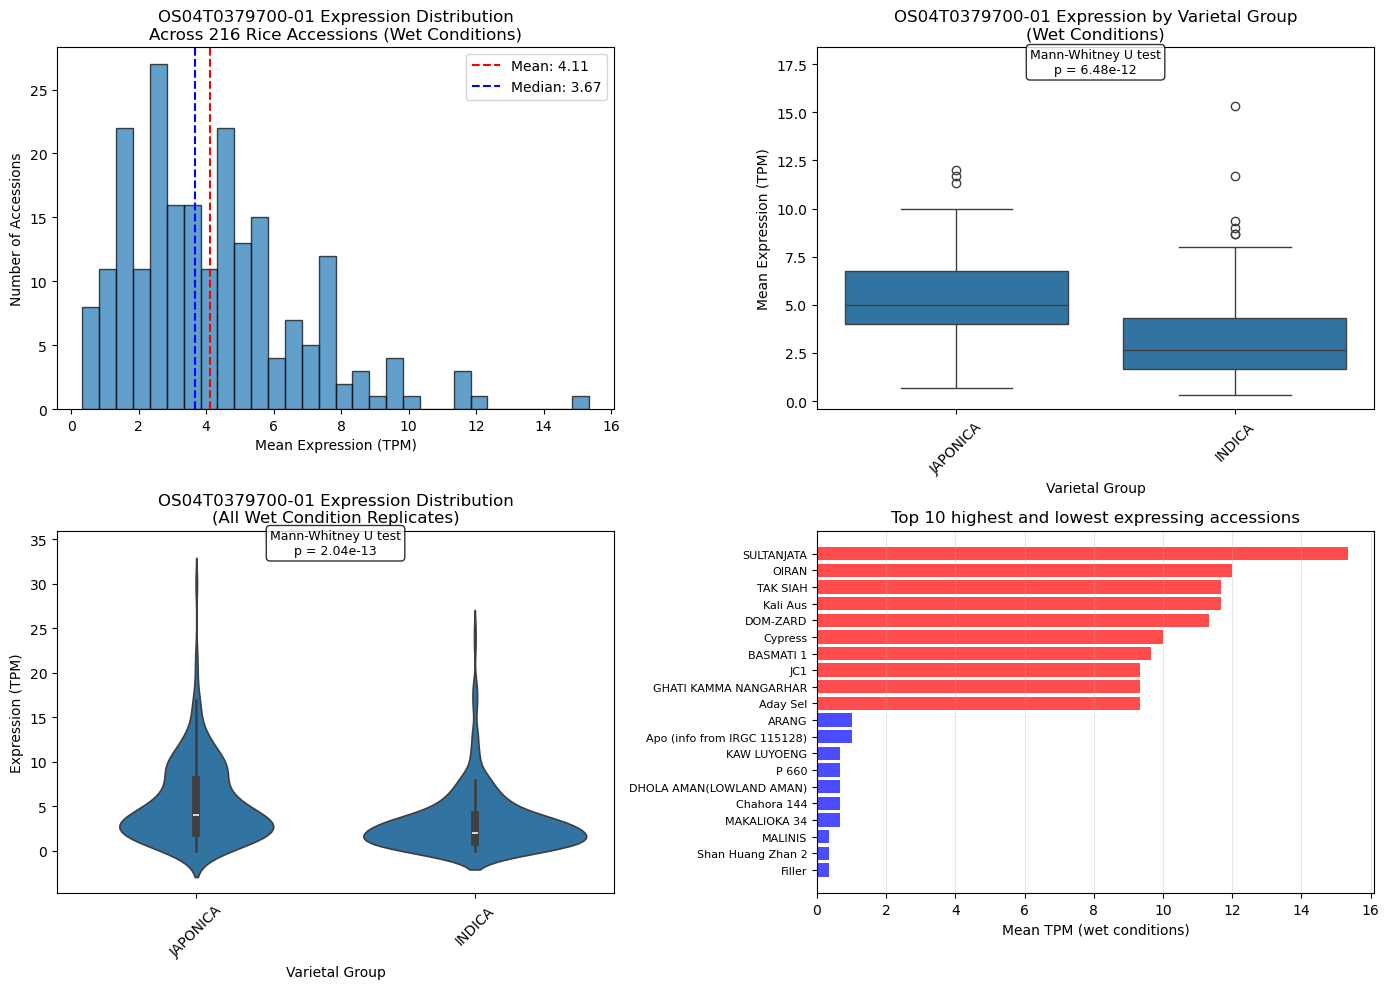

In [36]:
from scipy import stats

# Create visualization for Question 1
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Add spacing between plots

# 1. Distribution of mean expression across accessions
ax1 = axes[0, 0]
ax1.hist(wet_accession_means['mean'], bins=30, edgecolor='black', alpha=0.7)
ax1.set_xlabel('Mean Expression (TPM)')
ax1.set_ylabel('Number of Accessions')
ax1.set_title(f'{target_transcript} Expression Distribution\nAcross 216 Rice Accessions (Wet Conditions)')
ax1.axvline(wet_accession_means['mean'].mean(), color='red', linestyle='--', 
            label=f'Mean: {wet_accession_means["mean"].mean():.2f}')
ax1.axvline(wet_accession_means['mean'].median(), color='blue', linestyle='--', 
            label=f'Median: {wet_accession_means["mean"].median():.2f}')
ax1.legend()

# 2. Box plot by varietal group
ax2 = axes[0, 1]
wet_varietal = wet_df.groupby(['Accession_Name', 'Varietal _Group'])['Expression_TPM'].mean().reset_index()
wet_varietal_merged = wet_varietal.merge(
    wet_df[['Accession_Name', 'Varietal _Group']].drop_duplicates(), 
    on='Accession_Name', 
    suffixes=('', '_y')
)
sns.boxplot(data=wet_varietal, x='Varietal _Group', y='Expression_TPM', ax=ax2)
ax2.set_xlabel('Varietal Group')
ax2.set_ylabel('Mean Expression (TPM)')
ax2.set_title(f'{target_transcript} Expression by Varietal Group\n(Wet Conditions)')
ax2.tick_params(axis='x', rotation=45)

# Statistical test for box plot (using accession means)
indica_means = wet_varietal[wet_varietal['Varietal _Group'] == 'INDICA']['Expression_TPM']
japonica_means = wet_varietal[wet_varietal['Varietal _Group'] == 'JAPONICA']['Expression_TPM']
box_statistic, box_p_value = stats.mannwhitneyu(indica_means, japonica_means, alternative='two-sided')

# Add p-value annotation to box plot
y_max_box = wet_varietal['Expression_TPM'].max()
ax2.text(0.5, y_max_box * 1.1, f'Mann-Whitney U test\np = {box_p_value:.2e}', 
         ha='center', va='bottom', fontsize=9, 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
ax2.set_ylim(ax2.get_ylim()[0], y_max_box * 1.2)

# 3. Violin plot showing distribution with all replicates
ax3 = axes[1, 0]
sns.violinplot(data=wet_df, x='Varietal _Group', y='Expression_TPM', ax=ax3)
ax3.set_xlabel('Varietal Group')
ax3.set_ylabel('Expression (TPM)')
ax3.set_title(f'{target_transcript} Expression Distribution\n(All Wet Condition Replicates)')
ax3.tick_params(axis='x', rotation=45)

# Statistical test for violin plot (using all replicates)
indica_all = wet_df[wet_df['Varietal _Group'] == 'INDICA']['Expression_TPM']
japonica_all = wet_df[wet_df['Varietal _Group'] == 'JAPONICA']['Expression_TPM']
violin_statistic, violin_p_value = stats.mannwhitneyu(indica_all, japonica_all, alternative='two-sided')

# Add p-value annotation to violin plot
y_max_violin = wet_df['Expression_TPM'].max()
ax3.text(0.5, y_max_violin * 1.1, f'Mann-Whitney U test\np = {violin_p_value:.2e}', 
         ha='center', va='bottom', fontsize=9, 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
ax3.set_ylim(ax3.get_ylim()[0], y_max_violin * 1.2)

print(f"\nStatistical comparison between varietal groups:")
print(f"Box plot (accession means): INDICA mean = {indica_means.mean():.2f} ± {indica_means.std():.2f} TPM (n={len(indica_means)})")
print(f"Box plot (accession means): JAPONICA mean = {japonica_means.mean():.2f} ± {japonica_means.std():.2f} TPM (n={len(japonica_means)})")
print(f"Box plot p-value: {box_p_value:.2e}")

print(f"\nViolin plot (all replicates): INDICA mean = {indica_all.mean():.2f} ± {indica_all.std():.2f} TPM (n={len(indica_all)})")
print(f"Violin plot (all replicates): JAPONICA mean = {japonica_all.mean():.2f} ± {japonica_all.std():.2f} TPM (n={len(japonica_all)})")
print(f"Violin plot p-value: {violin_p_value:.2e}")

# 4. Top and bottom expressing accessions
ax4 = axes[1, 1]
top_bottom = pd.concat([
    wet_accession_means.nlargest(10, 'mean'),
    wet_accession_means.nsmallest(10, 'mean')
])
top_bottom = top_bottom.sort_values('mean')
colors = ['red' if x > wet_accession_means['mean'].median() else 'blue' 
          for x in top_bottom['mean']]
ax4.barh(range(len(top_bottom)), top_bottom['mean'], color=colors, alpha=0.7)
ax4.set_yticks(range(len(top_bottom)))
ax4.set_yticklabels(top_bottom.index, fontsize=8)
ax4.set_xlabel('Mean TPM (wet conditions)')
ax4.set_title('Top 10 highest and lowest expressing accessions')
ax4.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('OS04T0379700-01_wet_expression_variation.png', dpi=300, bbox_inches='tight')
plt.show()

#### Question 2: How does the expression of OS04T0379700-01 respond to dry conditions compared to wet conditions?

In [20]:
# Question 2: Treatment response analysis
# Prepare data for dry vs wet comparison
# Calculate mean expression per accession and treatment
treatment_comparison = merged_df.groupby(['Accession_Name', 'Treatment'])['Expression_TPM'].agg(['mean', 'std', 'count'])
treatment_comparison = treatment_comparison.reset_index()

# Pivot to have wet and dry as columns
treatment_pivot = treatment_comparison.pivot(index='Accession_Name', columns='Treatment', values='mean')
treatment_pivot.columns = ['Dry_mean', 'Wet_mean']

# Calculate fold change and difference
treatment_pivot['Difference'] = treatment_pivot['Dry_mean'] - treatment_pivot['Wet_mean']
treatment_pivot['Log2FC'] = np.log2((treatment_pivot['Dry_mean'] + 0.5) / (treatment_pivot['Wet_mean'] + 0.5))

print(f"Treatment response analysis for {target_transcript}:")
print(f"\nNumber of accessions analyzed: {len(treatment_pivot)}")
print(f"\nSummary statistics:")
print(treatment_pivot.describe())

# Statistical test (paired t-test since same accessions in both conditions)
from scipy import stats
t_stat, p_value = stats.ttest_rel(treatment_pivot['Dry_mean'], treatment_pivot['Wet_mean'])
print(f"\nPaired t-test results:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4e}")

# Count responsive accessions
up_regulated = (treatment_pivot['Difference'] > 1).sum()
down_regulated = (treatment_pivot['Difference'] < -1).sum()
print(f"\nAccessions with >1 TPM increase in dry: {up_regulated}")
print(f"Accessions with >1 TPM decrease in dry: {down_regulated}")

Treatment response analysis for OS04T0379700-01:

Number of accessions analyzed: 216

Summary statistics:
         Dry_mean    Wet_mean  Difference      Log2FC
count  216.000000  216.000000  216.000000  216.000000
mean     4.119856    4.110597    0.009259    0.000456
std      2.573520    2.556477    2.646961    0.816251
min      0.333333    0.333333  -12.333333   -2.201634
25%      2.333333    2.333333   -1.666667   -0.534758
50%      3.666667    3.666667    0.000000    0.000000
75%      5.333333    5.333333    1.666667    0.530515
max     15.000000   15.333333    8.000000    1.947533

Paired t-test results:
t-statistic: 0.0514
p-value: 9.5905e-01

Accessions with >1 TPM increase in dry: 66
Accessions with >1 TPM decrease in dry: 67


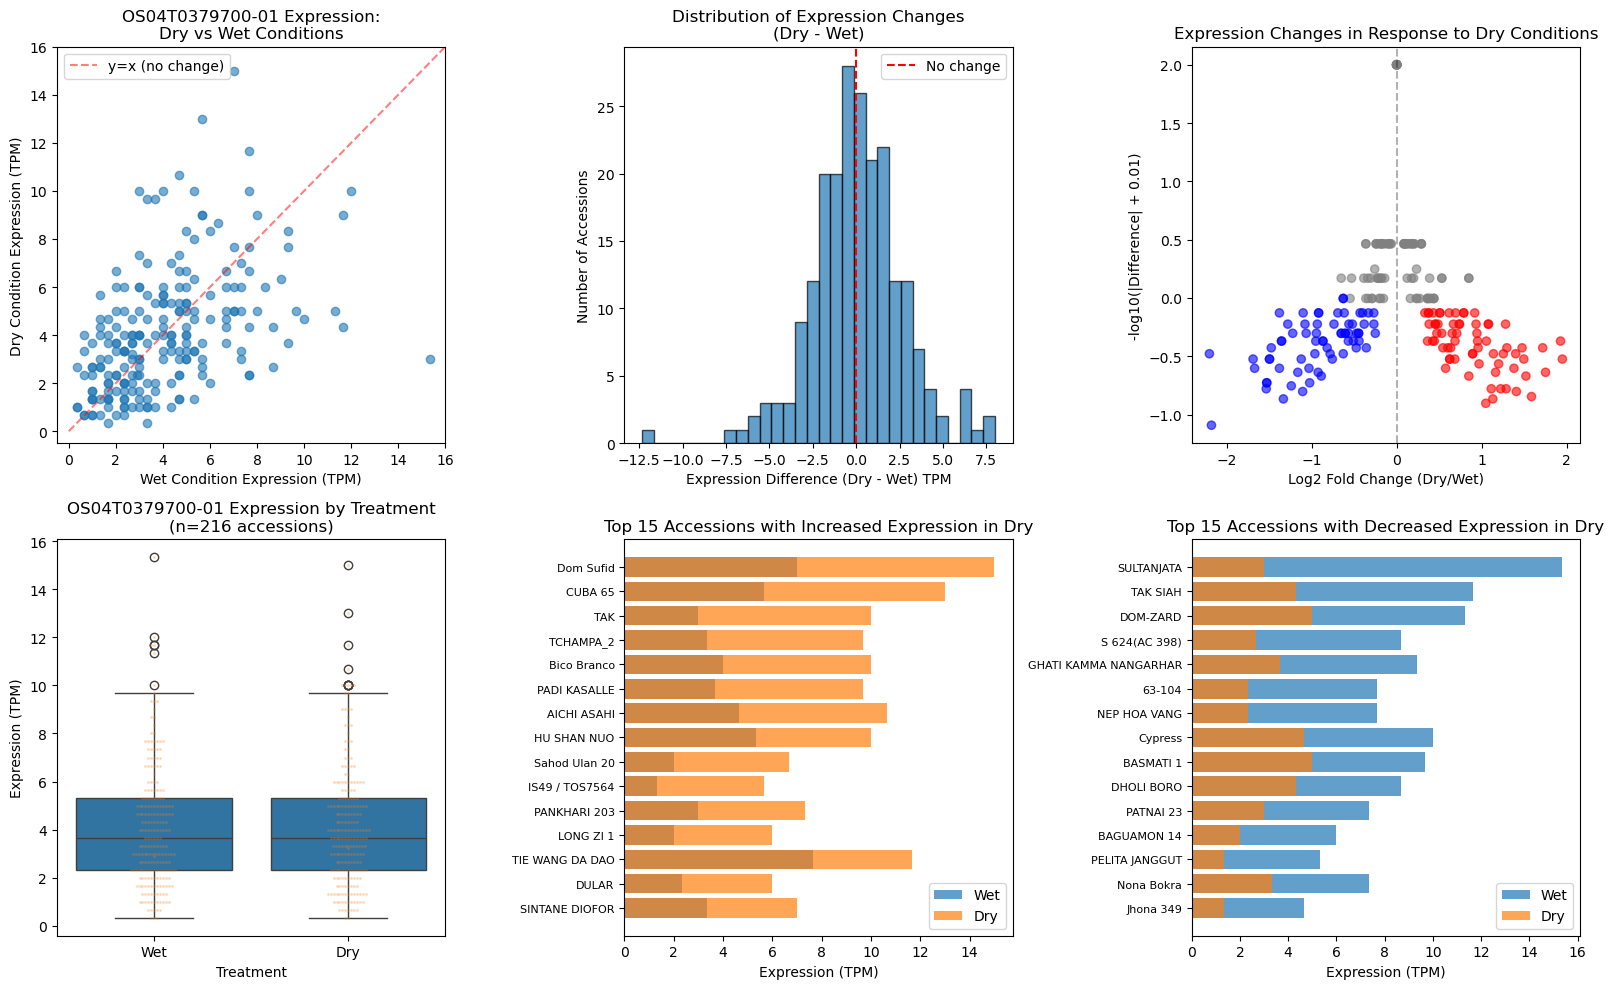

In [21]:
# Create comprehensive visualization for treatment response
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# 1. Scatter plot of wet vs dry expression
ax1 = axes[0, 0]
ax1.scatter(treatment_pivot['Wet_mean'], treatment_pivot['Dry_mean'], alpha=0.6)
ax1.plot([0, 16], [0, 16], 'r--', alpha=0.5, label='y=x (no change)')
ax1.set_xlabel('Wet Condition Expression (TPM)')
ax1.set_ylabel('Dry Condition Expression (TPM)')
ax1.set_title(f'{target_transcript} Expression:\nDry vs Wet Conditions')
ax1.legend()
ax1.set_xlim(-0.5, 16)
ax1.set_ylim(-0.5, 16)

# 2. Distribution of expression differences
ax2 = axes[0, 1]
ax2.hist(treatment_pivot['Difference'], bins=30, edgecolor='black', alpha=0.7)
ax2.axvline(0, color='red', linestyle='--', label='No change')
ax2.set_xlabel('Expression Difference (Dry - Wet) TPM')
ax2.set_ylabel('Number of Accessions')
ax2.set_title(f'Distribution of Expression Changes\n(Dry - Wet)')
ax2.legend()

# 3. Volcano plot
ax3 = axes[0, 2]
colors = ['red' if x > 1 else 'blue' if x < -1 else 'gray' 
          for x in treatment_pivot['Difference']]
ax3.scatter(treatment_pivot['Log2FC'], -np.log10(np.abs(treatment_pivot['Difference'])+0.01), 
           c=colors, alpha=0.6)
ax3.axvline(0, color='black', linestyle='--', alpha=0.3)
ax3.set_xlabel('Log2 Fold Change (Dry/Wet)')
ax3.set_ylabel('-log10(|Difference| + 0.01)')
ax3.set_title(f'Expression Changes in Response to Dry Conditions')

# 4. Paired boxplot
ax4 = axes[1, 0]
box_data = pd.DataFrame({
    'Wet': treatment_pivot['Wet_mean'],
    'Dry': treatment_pivot['Dry_mean']
})
box_data_melted = box_data.melt(var_name='Treatment', value_name='Expression')
sns.boxplot(data=box_data_melted, x='Treatment', y='Expression', ax=ax4)
sns.swarmplot(data=box_data_melted, x='Treatment', y='Expression', 
              alpha=0.3, size=2, ax=ax4)
ax4.set_ylabel('Expression (TPM)')
ax4.set_title(f'{target_transcript} Expression by Treatment\n(n=216 accessions)')

# 5. Top responders - increased in dry
ax5 = axes[1, 1]
top_increased = treatment_pivot.nlargest(15, 'Difference')[['Dry_mean', 'Wet_mean', 'Difference']]
positions = range(len(top_increased))
ax5.barh(positions, top_increased['Wet_mean'], label='Wet', alpha=0.7)
ax5.barh(positions, top_increased['Dry_mean'], left=0, label='Dry', alpha=0.7)
ax5.set_yticks(positions)
ax5.set_yticklabels(top_increased.index, fontsize=8)
ax5.set_xlabel('Expression (TPM)')
ax5.set_title('Top 15 Accessions with Increased Expression in Dry')
ax5.legend()
ax5.invert_yaxis()

# 6. Top responders - decreased in dry
ax6 = axes[1, 2]
top_decreased = treatment_pivot.nsmallest(15, 'Difference')[['Dry_mean', 'Wet_mean', 'Difference']]
positions = range(len(top_decreased))
ax6.barh(positions, top_decreased['Wet_mean'], label='Wet', alpha=0.7)
ax6.barh(positions, top_decreased['Dry_mean'], left=0, label='Dry', alpha=0.7)
ax6.set_yticks(positions)
ax6.set_yticklabels(top_decreased.index, fontsize=8)
ax6.set_xlabel('Expression (TPM)')
ax6.set_title('Top 15 Accessions with Decreased Expression in Dry')
ax6.legend()
ax6.invert_yaxis()

plt.tight_layout()
plt.savefig('OS04T0379700-01_treatment_response.png', dpi=300, bbox_inches='tight')
plt.show()

In [22]:
# Analyze treatment response by varietal group
varietal_response = merged_df.groupby(['Accession_Name', 'Treatment', 'Varietal _Group'])['Expression_TPM'].mean().reset_index()
varietal_pivot = varietal_response.pivot(index=['Accession_Name', 'Varietal _Group'], 
                                         columns='Treatment', values='Expression_TPM')
varietal_pivot['Difference'] = varietal_pivot['Dry'] - varietal_pivot['Wet']
varietal_pivot = varietal_pivot.reset_index()

# Summary by varietal group
group_summary = varietal_pivot.groupby('Varietal _Group').agg({
    'Wet': ['mean', 'std'],
    'Dry': ['mean', 'std'],
    'Difference': ['mean', 'std', 'count']
})

print("Treatment response by varietal group:")
print(group_summary)

# Statistical test for each group
print("\nStatistical tests by varietal group:")
for group in varietal_pivot['Varietal _Group'].unique():
    group_data = varietal_pivot[varietal_pivot['Varietal _Group'] == group]
    if len(group_data) > 1:
        t_stat, p_val = stats.ttest_rel(group_data['Dry'], group_data['Wet'])
        print(f"{group}: t={t_stat:.3f}, p={p_val:.4f}, n={len(group_data)}")

Treatment response by varietal group:
Treatment             Wet                 Dry           Difference            \
                     mean       std      mean       std       mean       std   
Varietal _Group                                                                
INDICA           3.281987  2.346138  3.143098  2.039083  -0.138889  2.415605   
JAPONICA         5.412698  2.331106  5.654762  2.586882   0.242063  2.974839   

Treatment              
                count  
Varietal _Group        
INDICA            132  
JAPONICA           84  

Statistical tests by varietal group:
JAPONICA: t=0.746, p=0.4579, n=84
INDICA: t=-0.661, p=0.5100, n=132


#### Analyze the response by varietal group to see if there are any group-specific patterns:

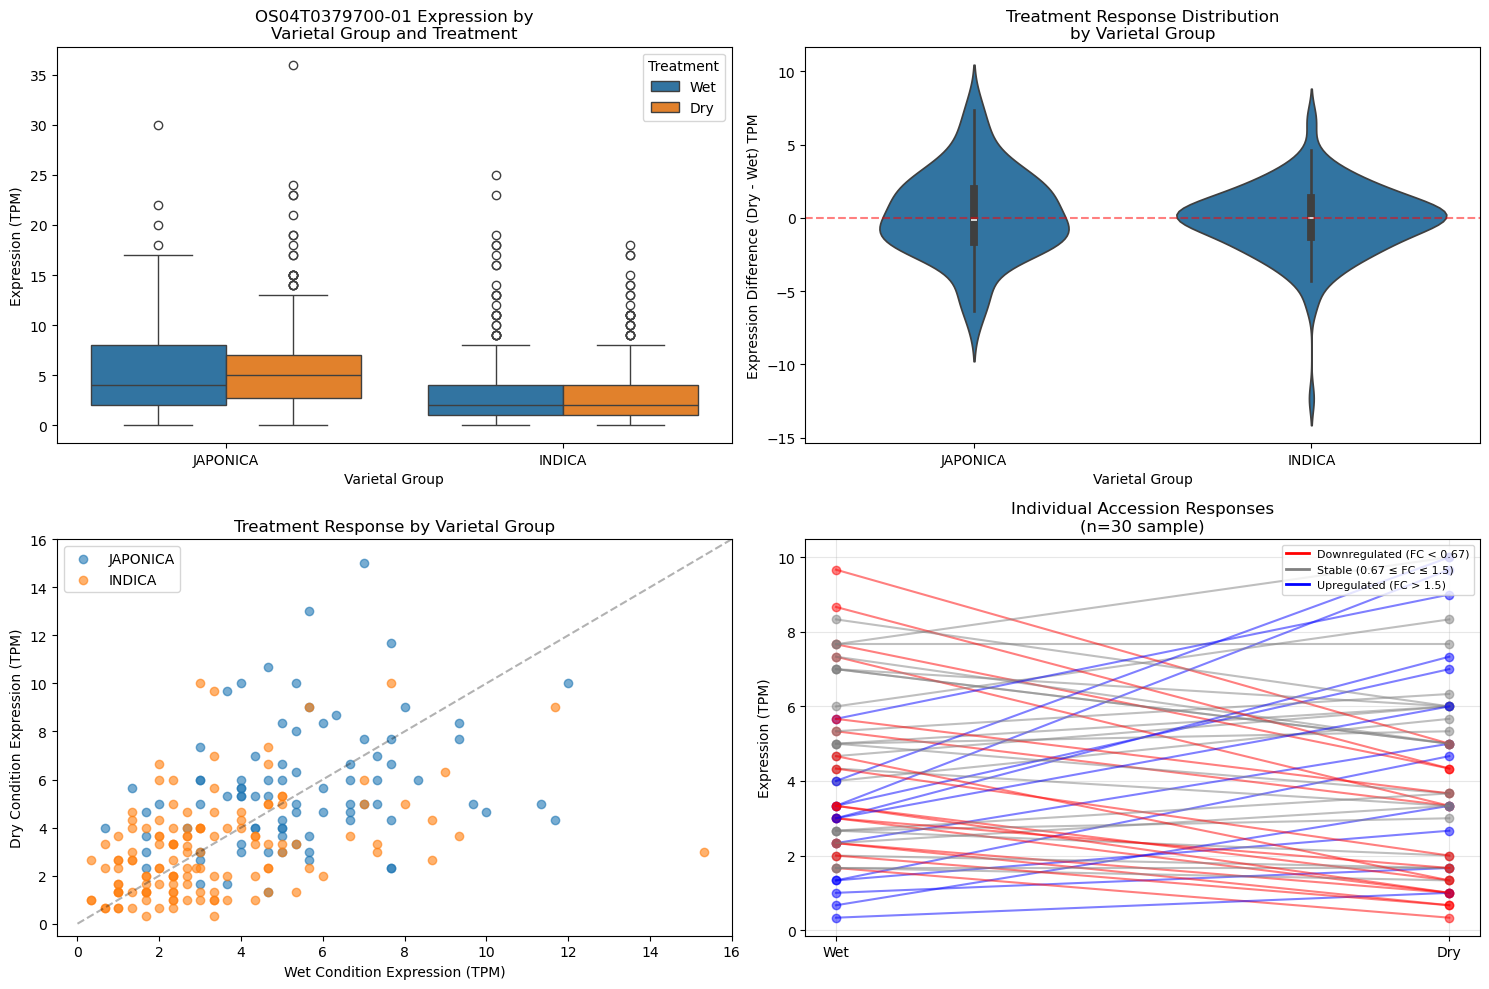

In [38]:
# Create a final summary visualization comparing varietal groups
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Grouped boxplot by treatment and varietal group
ax1 = axes[0, 0]
plot_data = merged_df[['Treatment', 'Varietal _Group', 'Expression_TPM']].copy()
sns.boxplot(data=plot_data, x='Varietal _Group', y='Expression_TPM', 
            hue='Treatment', ax=ax1)
ax1.set_ylabel('Expression (TPM)')
ax1.set_xlabel('Varietal Group')
ax1.set_title(f'{target_transcript} Expression by\nVarietal Group and Treatment')

# 2. Distribution of differences by group
ax2 = axes[0, 1]
sns.violinplot(data=varietal_pivot, x='Varietal _Group', y='Difference', ax=ax2)
ax2.axhline(0, color='red', linestyle='--', alpha=0.5)
ax2.set_ylabel('Expression Difference (Dry - Wet) TPM')
ax2.set_xlabel('Varietal Group')
ax2.set_title('Treatment Response Distribution\nby Varietal Group')

# 3. Scatter plot colored by group
ax3 = axes[1, 0]
for group in varietal_pivot['Varietal _Group'].unique():
    group_data = varietal_pivot[varietal_pivot['Varietal _Group'] == group]
    ax3.scatter(group_data['Wet'], group_data['Dry'], label=group, alpha=0.6)
ax3.plot([0, 16], [0, 16], 'k--', alpha=0.3)
ax3.set_xlabel('Wet Condition Expression (TPM)')
ax3.set_ylabel('Dry Condition Expression (TPM)')
ax3.set_title('Treatment Response by Varietal Group')
ax3.legend()
ax3.set_xlim(-0.5, 16)
ax3.set_ylim(-0.5, 16)

# 4. Paired comparison (showing individual changes for sample accessions)
ax4 = axes[1, 1]
# Sample 50 random accessions for clarity
sample_accessions = varietal_pivot.sample(n=min(50, len(varietal_pivot)), random_state=42)
for idx, row in sample_accessions.iterrows():
    fold_change = row['Dry'] / (row['Wet'] + 0.01)  # Add small value to avoid division by zero
    color = 'red' if fold_change < 0.67 else 'blue' if fold_change > 1.5 else 'gray'
    ax4.plot([0, 1], [row['Wet'], row['Dry']], 'o-', alpha=0.5, color=color)
ax4.set_xticks([0, 1])
ax4.set_xticklabels(['Wet', 'Dry'])
ax4.set_ylabel('Expression (TPM)')
ax4.set_title('Individual Accession Responses\n(n=30 sample)')
ax4.grid(True, alpha=0.3)

# Add legend for the 4th plot
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='red', lw=2, label='Downregulated (FC < 0.67)'),
                   Line2D([0], [0], color='gray', lw=2, label='Stable (0.67 ≤ FC ≤ 1.5)'),
                   Line2D([0], [0], color='blue', lw=2, label='Upregulated (FC > 1.5)')]
ax4.legend(handles=legend_elements, loc='upper right', fontsize=8)

plt.tight_layout()
plt.savefig('OS04T0379700-01_varietal_group_response.png', dpi=300, bbox_inches='tight')
plt.show()

#### Create a summary table of the most responsive accessions:

In [24]:
# Create summary table of most responsive accessions
treatment_pivot_full = treatment_pivot.copy()
treatment_pivot_full['Abs_Difference'] = np.abs(treatment_pivot_full['Difference'])

# Get top responsive accessions
top_responsive = treatment_pivot_full.nlargest(20, 'Abs_Difference')

# Add varietal group information
accession_info = merged_df[['Accession_Name', 'Varietal _Group', 'Subpopulation_3K-RG']].drop_duplicates()
top_responsive_info = top_responsive.merge(accession_info, left_index=True, right_on='Accession_Name')

# Format the output
summary_table = top_responsive_info[['Accession_Name', 'Varietal _Group', 'Subpopulation_3K-RG', 
                                      'Wet_mean', 'Dry_mean', 'Difference', 'Log2FC']]
summary_table = summary_table.round(2)

print(f"\nTop 20 Most Responsive Accessions to Dry Treatment for {target_transcript}:")
print("="*100)
print(summary_table.to_string(index=False))

# Save to CSV
summary_table.to_csv('OS04T0379700-01_top_responsive_accessions.csv', index=False)
print("\n✓ Summary table saved to 'OS04T0379700-01_top_responsive_accessions.csv'")


Top 20 Most Responsive Accessions to Dry Treatment for OS04T0379700-01:
       Accession_Name Varietal _Group      Subpopulation_3K-RG  Wet_mean  Dry_mean  Difference  Log2FC
           SULTANJATA          INDICA               circum-Aus     15.33      3.00      -12.33   -2.18
            Dom Sufid        JAPONICA           circum-Basmati      7.00     15.00        8.00    1.05
              CUBA 65        JAPONICA        Tropical japonica      5.67     13.00        7.33    1.13
             TAK SIAH        JAPONICA circum-Basmati / Admixed     11.67      4.33       -7.33   -1.33
                  TAK          INDICA               circum-Aus      3.00     10.00        7.00    1.58
             DOM-ZARD        JAPONICA           circum-Basmati     11.33      5.00       -6.33   -1.11
            TCHAMPA_2          INDICA               circum-Aus      3.33      9.67        6.33    1.41
          Bico Branco        JAPONICA        Tropical japonica      4.00     10.00        6.00    1.22


## Reports

### Analysis of OS01T0869800-01 Transcript Expression

**1. Expression Variation in Wet Conditions**<br>
The OS01T0869800-01 transcript shows substantial variation across the 216 rice accessions in wet conditions:

Mean expression: 411.28 ± 141.57 TPM<br>
Expression range: 134 to 890 TPM (6.6-fold difference)<br>
Coefficient of variation: 34.4%, indicating considerable natural variation<br>
The expression distribution is approximately normal with a slight right skew<br>
Most accessions cluster around 300-500 TPM, with some outliers showing much higher expression<br>

**Varietal Group Differences:**<br>
JAPONICA varieties show higher mean expression (469.4 TPM) compared to INDICA varieties (375.9 TPM) in wet conditions, Mann-Whitney U test p=9.5e-06

**2. Response to Dry Conditions**<br>
The transcript shows a general down-regulation in response to drought stress:

**Mean expression changes:**<br>
Wet conditions: 411.28 TPM<br>
Dry conditions: 348.17 TPM<br>
Mean Log2 fold change: -0.249 (indicating ~19% reduction)<br>

**Accession-specific responses vary dramatically:**<br>
70.4% of accessions (152) show down-regulation<br>
29.2% of accessions (63) show up-regulation<br>
1 accession shows no change<br>

**Range of responses:**<br>
Most down-regulated: SULTANJATA (Log2FC = -1.34, 2.5-fold decrease)<br>
Most up-regulated: IS49/TOS7564 (Log2FC = 1.06, 2.1-fold increase)<br>
Statistical significance: The overall down-regulation is highly significant (paired t-test p = 2.19e-12)<br>

**Summary**<br>
OS01T0869800-01 appears to be generally down-regulated under drought stress<br>
Genetic diversity: The wide variation in both baseline expression and drought response across accessions<br>
Varietal differences: JAPONICA shows higher expression under wet conditions, but both INDICA (132 accessions) and JAPONICA (84 accessions) varieties show similar down-regulation patterns (Log2FC of -0.23 and -0.27 respectively).

### Analysis of OS04T0379700-01 Transcript Expression

**1. Expression Variation Across 216 Accessions in Wet Conditions**

**Key Findings:**

Expression Range:<br>
The transcript shows considerable variation across accessions, with mean expression ranging from 0.33 to 15.33 TPM in wet conditions

**Overall Statistics:**<br>
Mean expression: 4.11 TPM<br>
Median expression: 3.67 TPM<br>
Standard deviation: 2.56 TPM<br>

**Top Expressing Accessions (wet conditions):**<br>
SULTANJATA: 15.33 TPM<br>
OIRAN: 12.00 TPM<br>
TAK SIAH: 11.67 TPM<br>
Kali Aus: 11.67 TPM<br>
DOM-ZARD: 11.33 TPM<br>

**Varietal Group Differences:**<br>
JAPONICA varieties show higher mean expression (5.41 TPM) compared to INDICA varieties (3.28 TPM) in wet conditions

**2. Expression Response to Dry vs Wet Conditions**

**Key Findings:**<br>
Overall Response: No significant overall change in expression between dry and wet conditions<br>
Mean difference (Dry - Wet): 0.009 TPM<br>
Paired t-test: p = 0.959 (not significant)<br>

**Individual Accession Responses:**<br>
Despite no overall trend, individual accessions show substantial responses:<br>
66 accessions increased expression by >1 TPM in dry conditions<br>
67 accessions decreased expression by >1 TPM in dry conditions<br>

**Most Responsive Accessions:**<br>
Largest decrease in dry: SULTANJATA (-12.33 TPM change)<br>
Largest increase in dry: Dom Sufid (+8.00 TPM change)<br>

**Varietal Group Response:**<br>
Neither JAPONICA nor INDICA groups showed significant overall response to treatment (p > 0.45 for both)

**Summary**<br>
High variability between accessions, suggesting genetic variation in baseline expression levels<br>
No consistent drought response across the population, but strong accession-specific responses<br>
Bidirectional responses to dry conditions, with roughly equal numbers of accessions showing increased or decreased expression

### Analysis of OS04T0448900-00 Transcript Expression

**1. Expression Variation in Wet Conditions**

**Key Findings:**<br>
The OS04T0448900-00 transcript shows substantial variation across the 216 accessions in wet conditions
Expression range: 8.33 - 66.33 TPM (mean expression per accession)

**Overall statistics:**<br>
Mean: 30.71 TPM<br>
Median: 29.33 TPM<br>
Standard deviation: 11.59 TPM<br>
Coefficient of variation: 37.7% (moderate variability)

**Top expressing accessions (wet conditions):**<br>
MUDGO: 66.33 TPM<br>
SULTANJATA: 64.00 TPM<br>
DA1: 64.00 TPM<br>
TAM CAU 9 A: 62.67 TPM<br>
KATAKTARA DA 2: 60.33 TPM<br>

**Lowest expressing accessions:**<br>
CONG LIANG 1: 8.33 TPM<br>
Chahora 144: 11.33 TPM<br>
KAW LUYOENG: 11.33 TPM<br>

**2. Response to Dry vs Wet Conditions**

**Overall Response Pattern:**<br>
The transcript is generally downregulated under dry conditions<br>
Mean expression: 30.71 TPM (wet) vs 23.58 TPM (dry)<br>
Mean fold change: 0.826 (indicating ~17% reduction in dry conditions)<br>
The response is statistically significant (p < 0.001, paired t-test)<br>
Effect size: Cohen's d = 0.63 (medium effect)

**Response Categories:**<br>
87 accessions (39%) show strong downregulation (FC < 0.67)<br>
123 accessions (56%) show moderate/stable expression (0.67 ≤ FC ≤ 1.5)<br>
11 accessions (5%) show upregulation (FC > 1.5)<br>

**Varietal Group Differences:**<br>
Both INDICA and JAPONICA varieties show significant downregulation<br>
INDICA: Mean FC = 0.834 (p < 0.001)<br>
JAPONICA: Mean FC = 0.814 (p < 0.001)<br>
The response is similar between the two major varietal groups

**Most Drought-Responsive Accessions:**

Upregulated in dry conditions:<br>
CONG LIANG 1: 2.68-fold increase<br>
AI LAN KE 1110: 2.00-fold increase<br>
PAGAIYAHAN: 1.89-fold increase

Downregulated in dry conditions:<br>
ARC 7229: 0.27-fold (73% reduction)<br>
AZUCENA: 0.27-fold (73% reduction)<br>
TAM CAU 9 A: 0.28-fold (72% reduction)

**Summary**<br>
The OS04T0448900-00 transcript appears to be a drought-responsive gene that is predominantly downregulated under water stress conditions.
Some accessions show upregulation while most show downregulation which indicates different drought response strategies among rice varieties. Some accessions show unusual responses (like CONG LIANG 1 with 2.68-fold upregulation).